# Fraud Detection 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

In [6]:
df = pd.read_csv("AIML Dataset.csv")

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
df["isFlaggedFraud"].value_counts()


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
df.shape

(6362620, 11)

In [14]:
round((df['isFraud'].value_counts()[1] / df.shape[0]) * 100,2)
# there is imbalance have to deal later

np.float64(0.13)

In [15]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

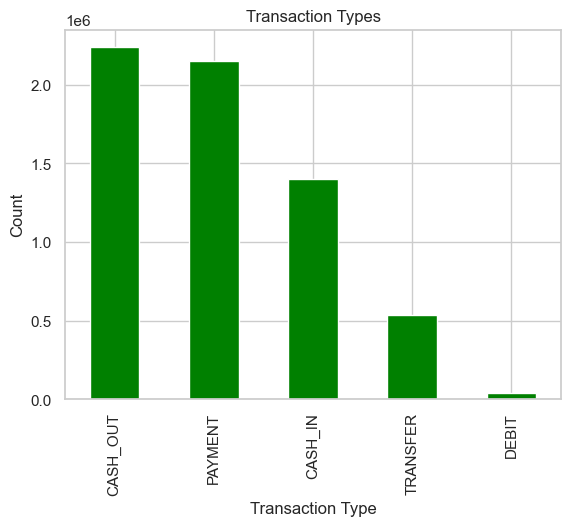

In [16]:
df["type"].value_counts().plot(kind = "bar",title = "Transaction Types",color="green")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Fraud Rate')

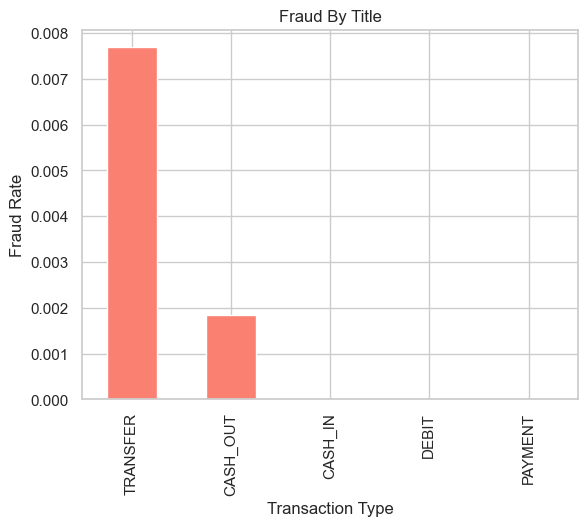

In [17]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending = False)
fraud_by_type.plot(kind='bar',color='salmon',title="Fraud By Title")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")

In [18]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

Text(0.5, 0, 'Log(Amount + 1 )')

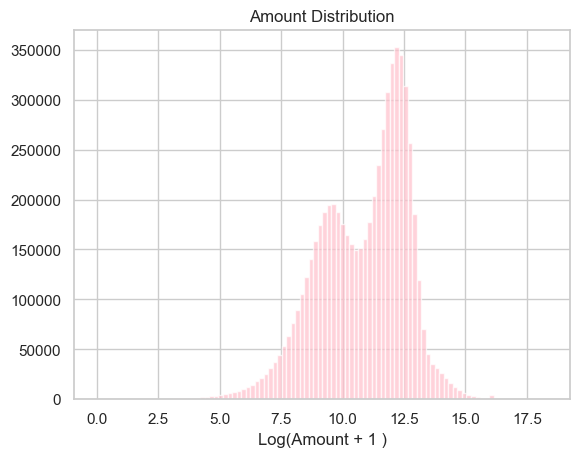

In [19]:
# histogram of amount distrubution
plt.hist(np.log1p(df['amount']),bins=100,color = 'pink',alpha = 0.7)
plt.title("Amount Distribution")
plt.xlabel("Log(Amount + 1 )")


Text(0.5, 0, 'Log(Amount + 1)')

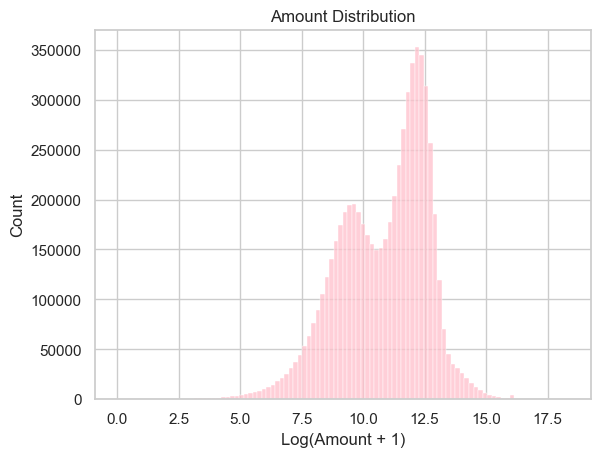

In [20]:
sns.histplot(np.log1p(df['amount']), bins=100, kde=False, color='pink')
plt.title("Amount Distribution")
plt.xlabel("Log(Amount + 1)")



In [21]:
df[df["amount"] < 50000].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Text(0.5, 1.0, 'Amount vs isFraud ()')

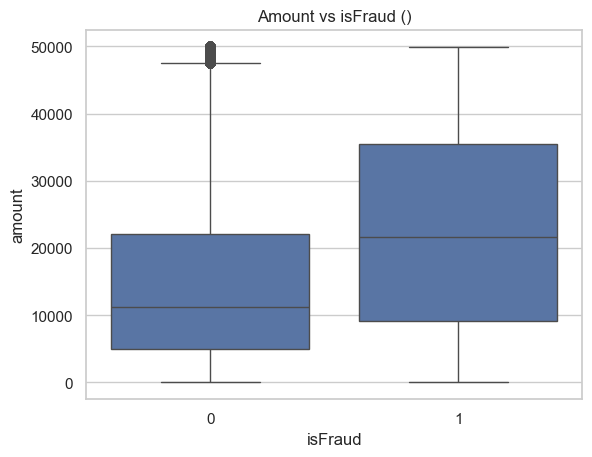

In [22]:
sns.boxplot(data = df[df["amount"] < 50000], x= "isFraud",y="amount")
plt.title("Amount vs isFraud ()")


In [57]:
df.columns
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [50]:
df["balancedDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [52]:
(df["balancedDiffOrig"] < 0).sum().astype(int)

np.int64(1399253)

In [56]:
(df["balanceDiffDest"] < 0).sum().astype(int)
#  imabalnce and neagtive values

np.int64(1238864)

Text(0.5, 1.0, 'Frauds over time')

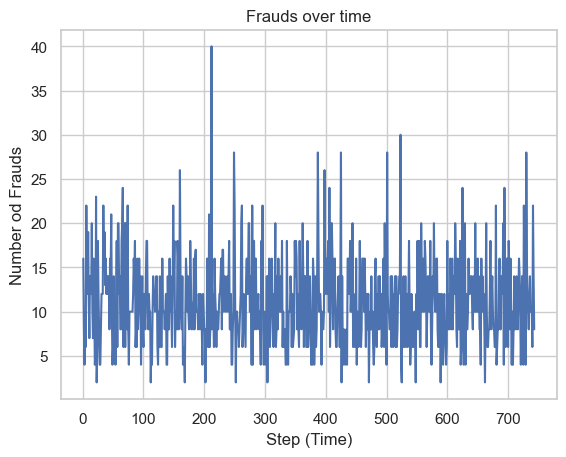

In [60]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values,label = "Frauds per step")
plt.xlabel("Step (Time)")
plt.ylabel("Number od Frauds")
plt.title("Frauds over time")

# not dependent on time therefore will DROP step column

In [62]:
df.drop(columns = "step",inplace= True)

In [63]:
df.head(2)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


In [64]:
df.columns


Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balancedDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [68]:
# want top senders and top recievers
top_senders = df["nameOrig"].value_counts().sort_values(ascending=False).head(5)

In [69]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
Name: count, dtype: int64

In [71]:
# top receivers
top_rec = df["nameDest"].value_counts().sort_values(ascending = False).head(5)

In [72]:
top_rec

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
Name: count, dtype: int64

In [78]:
fraud_users = df[df["isFraud"]==1].head(5)

In [79]:
fraud_users

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balanceDiffDest
2,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,181.0,0.0
3,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,181.0,-21182.0
251,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,2806.0,0.0
252,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0,2806.0,-26202.0
680,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,20128.0,0.0


In [75]:
fraud_type = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [76]:
fraud_type["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

In [ ]:
fraud_type

Text(0.5, 1.0, 'Fraud Distribution in Transfer and Cash out')

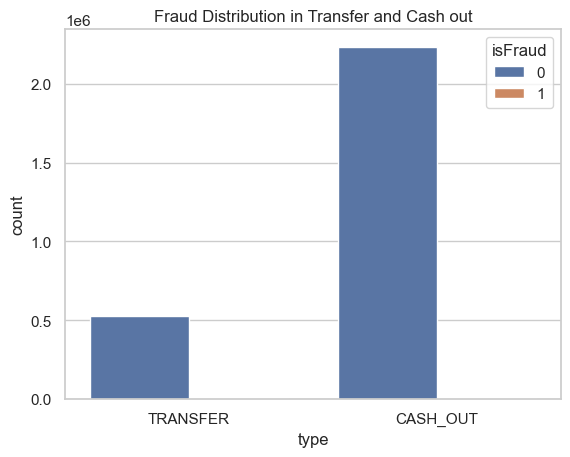

In [80]:
sns.countplot(data = fraud_type,x="type",hue ="isFraud")
plt.title("Fraud Distribution in Transfer and Cash out")

In [88]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [89]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


Text(0.5, 1.0, 'Coorelation Matrix')

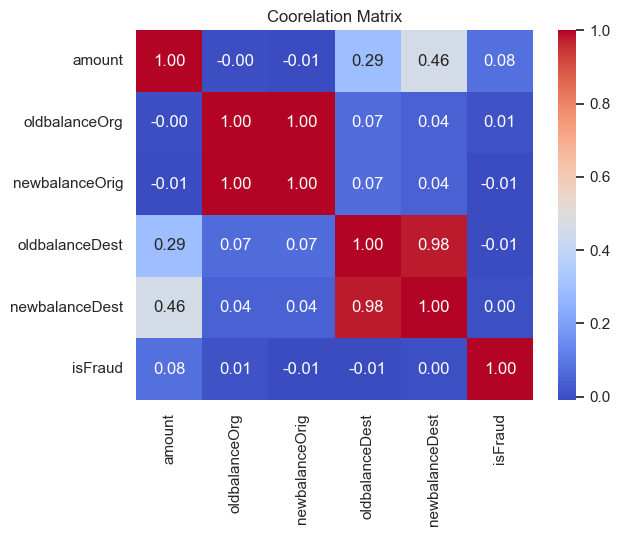

In [91]:
sns.heatmap(corr,annot = True,cmap = "coolwarm",fmt=".2f")
plt.title("Coorelation Matrix")

In [92]:
# customer having 0 balance after transaction

zero_after_transaction = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [93]:
zero_after_transaction.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


# Training A ML Model

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# # new model to try
# from sklearn.ensemble import RandomForestClassifier

# # new and fast model
# from xgboost import XGBClassifier


In [23]:
# drop unncessary column
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis =1)

In [24]:
df_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [25]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [26]:
y = df_model['isFraud']
x =df_model.drop(["isFraud"],axis=1)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify = y)

## PreProcessing


In [28]:
preprocessor= ColumnTransformer(
    transformers = [
        ("num", StandardScaler(),numeric),
        ("cat",OneHotEncoder(drop ="first"),categorical)
    ],
    remainder = "drop"
)

## Model Pipeline 

In [32]:
pipeline = Pipeline ([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter = 1000))
])

In [ ]:
# pipeline = Pipeline([
#     ("prep", preprocessor),
#     ("clf", RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth=10, random_state=42))
# ])

In [34]:
pipeline.fit(x_train,y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
y_pred = pipeline.predict(x_test)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [37]:
confusion_matrix(y_test,y_pred)

array([[1803229,  103093],
       [    152,    2312]])

In [38]:
pipeline.score(x_test,y_test) * 100

94.5910646871886

In [39]:
import joblib

joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']